In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [6]:
df_train.dtypes

Unnamed: 0                   int64
NU_INSCRICAO                object
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC     

In [7]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [1]:
corr_NU_MATH = pd.DataFrame(df_train.corr()['NU_NOTA_MT'].sort_values(ascending=False))

NameError: name 'pd' is not defined

In [9]:
corr_NU_MATH.head(20)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695
NU_NOTA_REDACAO,0.379376
TP_DEPENDENCIA_ADM_ESC,0.373233
NU_NOTA_COMP3,0.350307
NU_NOTA_COMP5,0.343337
NU_NOTA_COMP4,0.342282
NU_NOTA_COMP2,0.335638


In [10]:
x = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
y = df_train[['NU_NOTA_MT']]

In [11]:
x.isna().sum()/x.shape[0]

NU_NOTA_CN         0.246832
NU_NOTA_CH         0.246832
NU_NOTA_LC         0.261981
NU_NOTA_REDACAO    0.261981
dtype: float64

In [12]:
x.fillna(0, inplace=True, axis=1)
y.fillna(0, inplace=True)

C:\Users\gnach\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [13]:
x.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [14]:
x.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,436.3,495.4,581.2,520.0
1,474.5,544.1,599.0,580.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


# Linear Regression

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

linear_regression = LinearRegression()
linear_regression_train = linear_regression.fit(x_train, y_train)

In [16]:
y_pred = linear_regression.predict(x_test)

In [17]:
r2_score(y_test, y_pred)

0.9069018846537344

In [18]:
linear_mse = mean_squared_error(y_test, y_pred)

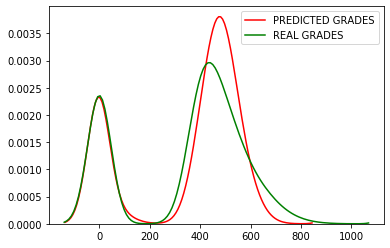

In [19]:
sns.distplot(y_pred, color='r', label='PREDICTED GRADES', hist=False)
sns.distplot(y_test, color='g', label='REAL GRADES', hist=False) 
plt.show()

# Ridge Regression

In [20]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [21]:
ridge_regression = Ridge(alpha=1, random_state=42)

ridge_regression.fit(x_train_scaled, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [22]:
y_pred = ridge_regression.predict(x_test_scaled)

In [23]:
r2_score(y_test, y_pred)

0.9049274519024395

In [24]:
ridge_mse = mean_squared_error(y_test, y_pred)

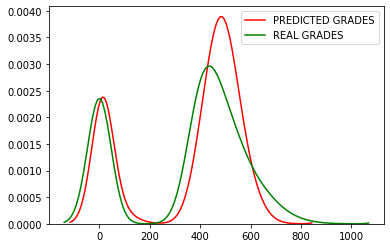

In [25]:
sns.distplot(y_pred, color='r', label='PREDICTED GRADES', hist=False)
sns.distplot(y_test, color='g', label='REAL GRADES', hist=False) 
plt.show()

# Lasso Regressor

In [26]:
lasso_regression = Lasso(alpha=0.5)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

lasso_regression.fit(x_train_scaled, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
y_pred = lasso_regression.predict(x_test_scaled)

In [28]:
lasso_mse = mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.9046245388805371

In [29]:
linear_mse, ridge_mse, lasso_mse

(5006.370032662344, 5112.545554270118, 5128.834763452441)

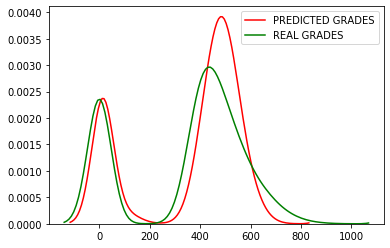

In [30]:
sns.distplot(y_pred, color='r', label='PREDICTED GRADES', hist=False)
sns.distplot(y_test, color='g', label='REAL GRADES', hist=False) 
plt.show()

# Test

In [33]:
x_answer = df_test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]

In [34]:
x_answer.fillna(0, inplace=True)

C:\Users\gnach\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [35]:
y_answer = linear_regression.predict(x_answer)

In [36]:
y_answer[y_answer<0] = 0

In [37]:
df_test['NU_NOTA_MT'] = np.round(y_answer, 2)

In [38]:
df_test = df_test[['NU_INSCRICAO', 'NU_NOTA_MT']]

In [39]:
df_test

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,424.97
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,481.85
2,b38a03232f43b11c9d0788abaf060f7366053b6d,561.14
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.00
4,715494628a50142ce8cb17191cfe6d0f3cae0934,549.36
5,e656d6bad65c93fb2880f1eba5037008c8e75774,474.74
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,536.17
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,412.97
8,043c544a2104aa8a9849f1a703a08d37a2f16839,491.69
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,462.47


In [40]:
df_test.to_csv('answer.csv', index=False)